# Gradient Descent

In [110]:
from sklearn.datasets import load_diabetes  # 당뇨병 환자 데이터

In [111]:
dia = load_diabetes()

In [112]:
print(type(dia))
print(dia.keys())

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [113]:
print(dia.data.shape)
print(dia.target.shape)

(442, 10)
(442,)


<center>
<img src = 'https://drive.google.com/uc?id=1n31sar0xRzPaxF0a4MYLcdB6mS9D3SFp' width = '500' height = '400' /><br>
</center>

In [114]:
import matplotlib.pyplot as plt

In [115]:
x = dia.data
y = dia.target

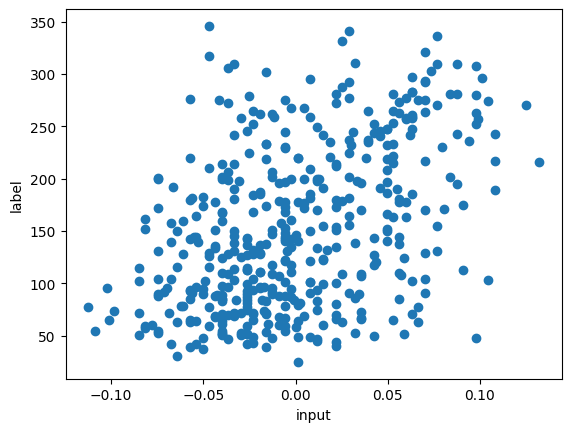

In [116]:
plt.scatter(x[:,3],y)
plt.xlabel('input')
plt.ylabel('label')
plt.show()

# Train Data에 잘 맞는 weight, bias 찾는 방법

<center>
<img src = 'https://drive.google.com/uc?id=1lL2d4Z9PVKp9As-4ATgMEZZBfgp2APMt' width = '800' height = '180' /><br>
</center>

In [117]:
# 1번 과정
w = 1.
b = 1.

In [118]:
# 2번 과정
x = dia.data[:,2]
y_hat = x[0] * w + b

In [119]:
# 3번 과정
print(f'target: {y[0]}, prediction: {y_hat}')

target: 151.0, prediction: 1.0616962065186832


In [120]:
# 4번 과정
w = 1. + 0.5
b = 1.

In [121]:
# 2 ~ 3번 반복
y_hat = x[0] * w + b
print(f'target: {y[0]}, predict: {y_hat} -> 0.03 증가해서 target에 가까워짐')

target: 151.0, predict: 1.092544309778025 -> 0.03 증가해서 target에 가까워짐


In [122]:
# 두번째 sample 이용
y_hat = x[1] * w + b
err = y[1] - y_hat
w_rate = x[1] # 두번째 sample의 변화율은 sample 값 그 자체이다.
w_new = w + w_rate * err
b_new = b + 1 * err
print(f'target: {y[1]}, predict: {y_hat}')
print(f'w_new: {w_new}, b_new: {b_new}')

target: 75.0, predict: 0.922788908141799
w_new: -2.3130549001418723, b_new: 75.0772110918582


## 전체 data 이용하여 weight, bias 조정하기

<center>
<img src = 'https://drive.google.com/uc?id=1ClOToycOs8m4JQuZhgsOFyPKHRSZIgle' width = '800', height = '230' ><br>
</center>

In [123]:
# 1번 과정
w = 1.
b = 1.

In [124]:
for xi, yi in zip(x, y):  # zip : x, y를 tuple로 반환
  y_hat = xi * w + b
  w_rate = xi   # weight 변화율은 input 그 자체
  b_rate = 1    # bias 변화율은 언제나 1
  err = yi - y_hat
  w += w_rate * err
  b += 1 * err

print(w, b)

587.8654539985616 99.4093556453094


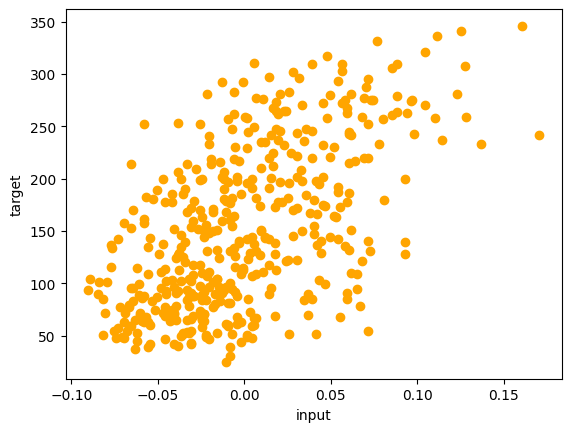

In [125]:
plt.scatter(x, y, color = 'orange')
plt.xlabel('input')
plt.ylabel('target')
plt.show()


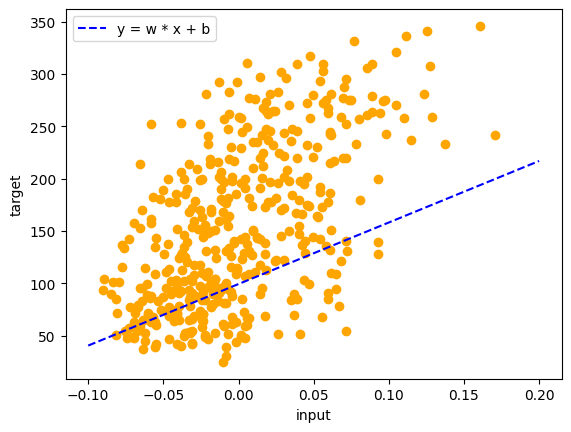

In [129]:
# y = w * x + b 직선을 구현해야함
# x의 범위 : -0.1 < x < 2

plt.scatter(x, y, color = 'orange')
cordinate_1 = (-0.1, w * (-0.1) + b) # 직선의 맨 왼쪽 점의 좌표
cordinate_2 = (0.2, w * 0.2 + b)     # 직선의 맨 오른쪽 점의 좌표
plt.plot([cordinate_1[0], cordinate_2[0]], [cordinate_1[1], cordinate_2[1]], linestyle = '--', label = 'y = w * x + b', color = 'blue')
plt.xlabel('input')
plt.ylabel('target')
plt.legend()  # 범례 추가 : plot에서 label 필수
plt.show()

## 위의 과정을 100번 진행 : epoch 100

weight: 913.5973364346786, bias: 123.39414383177173


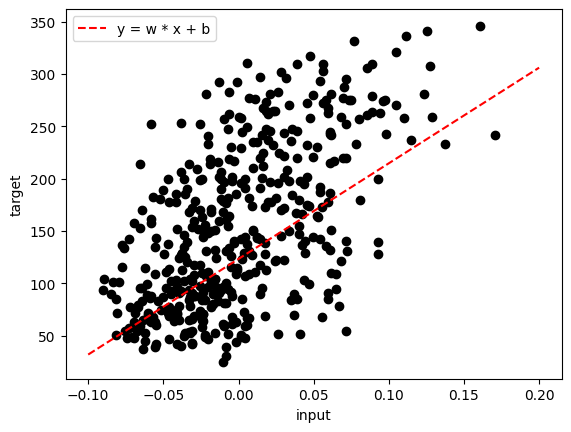

Linear Regression Model Using Gradient Descent : y_hat = 913.6 * x + 123.4


In [130]:
w = 1.
b = 1.

for _ in range(100):
  for xi, yi in zip(x, y):
    y_hat = w * xi + b
    w_rate = xi
    b_rate = 1
    err = yi - y_hat
    w += w_rate * err
    b += b_rate * err

print(f'weight: {w}, bias: {b}')

plt.scatter(x, y, color = 'black')
cordinate_1 = (-0.1, w * (-0.1) + b) # 직선의 맨 왼쪽 점의 좌표
cordinate_2 = (0.2, w * 0.2 + b)     # 직선의 맨 오른쪽 점의 좌표
plt.plot([cordinate_1[0], cordinate_2[0]], [cordinate_1[1], cordinate_2[1]], linestyle = '--', label = 'y = w * x + b', color = 'red')
plt.xlabel('input')
plt.ylabel('target')
plt.legend()  # 범례 추가 : plot에서 label 필수
plt.show()

print(f'Linear Regression Model Using Gradient Descent : y_hat = 913.6 * x + 123.4')

## 평가 : 새로운 input에 대한 Model의 예측

In [131]:
x_new = 0.18
y_pred = w * x_new + b
print(y_pred)

287.8416643900139


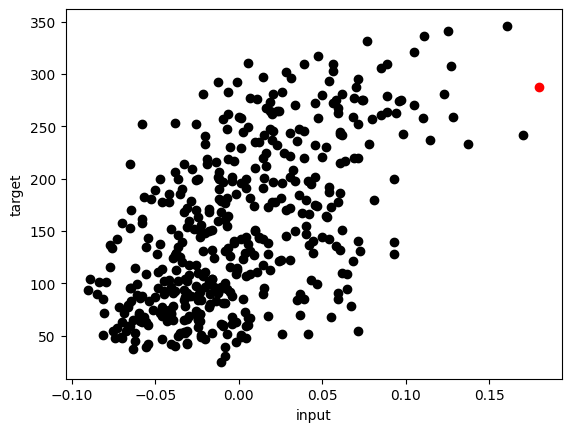

In [132]:
plt.scatter(x, y, color = 'black')
plt.scatter(x_new, y_pred, color = 'red') # 새로운 data에 대한 예측
plt.xlabel('input')
plt.ylabel('target')
plt.show()